# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 25 апреля 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 25 апреля, -4 баллов после 06:00 2 мая, -6 баллов после 06:00 9 мая

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import time
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# %load_ext pycodestyle_magic

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

In [28]:
# %%pycodestyle


class MyKmeans(object):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', epsilon=1e-9):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter

        self.epsilon = epsilon

        if init == 'random':
            self.kmeans = False
        elif init == 'k-means':
            self.kmeans = True

    def __init_centroids(self, X):
        xmin = np.min(X, axis=0)
        xmax = np.max(X, axis=0)

        if self.kmeans:
            self.centroids[0] = np.random.random_sample((1, X.shape[1]))\
                * (xmax - xmin) + xmin
            for j in range(1, self.k):
                dists = np.min(cdist(X,
                                     self.centroids[:j],
                                     metric=self.metric),
                               axis=1)
                dists = dists / dists.sum()
                self.centroids[j] = X[np.random.choice(X.shape[0], p=dists)]
        else:
            self.centroids = np.random.random_sample((self.k, X.shape[1]))\
                * (xmax - xmin) + xmin

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        # ...
        self.__init_centroids(X)

        for i in range(self.max_iter):

            # updating labels on current iteration
            self.labels = np.argmin(cdist(X,
                                          self.centroids,
                                          metric=self.metric),
                                    axis=1)

            # updating centroids
            new_centroids = np.empty((self.centroids.shape))
            for j in range(self.k):
                cluster = X[self.labels == j]
                if(cluster.shape[0] != 0):
                    new_centroids[j] = cluster.sum(axis=0) / cluster.shape[0]
                else:
                    new_centroids[j] = self.centroids[j]

            # checking whether we can stop
            dist = ((self.centroids - new_centroids) ** 2).sum(axis=1)
            dist = np.sqrt(dist)
            if np.all(dist < self.epsilon):
                break

            self.centroids = new_centroids
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """

        return np.argmin(cdist(X, self.centroids, metric=self.metric), axis=1)


class MiniBatchKMeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 batch_size=10, random_state=None,
                 init='random', epsilon=1e-3):
        super(MiniBatchKMeans, self).__init__(k,
                                              metric,
                                              max_iter,
                                              random_state,
                                              init,
                                              epsilon)
        self.batch_size = batch_size

    def __init_centroids(self, X):
        xmin = np.min(X, axis=0)
        xmax = np.max(X, axis=0)

        if self.kmeans:
            self.centroids[0] = np.random.random_sample((1, X.shape[1]))\
                * (xmax - xmin) + xmin
            for j in range(1, self.k):
                dists = np.min(cdist(X,
                                     self.centroids[:j],
                                     metric=self.metric),
                               axis=1)
                dists = dists / dists.sum()
                self.centroids[j] = X[np.random.choice(X.shape[0], p=dists)]
        else:
            self.centroids = np.random.random_sample((self.k, X.shape[1]))\
                * (xmax - xmin) + xmin

    def fit(self, X, y=None):
        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        # Your Code Here
        # ...
        self.__init_centroids(X)

        for i in range(self.max_iter):

            # updating labels on current iteration
            self.labels = np.argmin(cdist(X,
                                          self.centroids,
                                          metric=self.metric),
                                    axis=1)
            mbatch_idx = np.random.choice(X.shape[0],
                                          size=self.batch_size,
                                          replace=False)
            mbatch = X[mbatch_idx]
            mlabels = self.labels[mbatch_idx]
            # updating centroids
            new_centroids = np.empty((self.centroids.shape))
            for j in range(self.k):

                cluster = mbatch[mlabels == j]

                if(cluster.shape[0] != 0):
                    new_centroids[j] = cluster.sum(axis=0) / cluster.shape[0]
                else:
                    new_centroids[j] = self.centroids[j]

            # checking whether we can stop
            dist = ((self.centroids - new_centroids) ** 2).sum(axis=1)
            dist = np.sqrt(dist)
            if np.all(dist < self.epsilon):
                break
            self.centroids = new_centroids
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [78]:
from sklearn.datasets import make_blobs

In [79]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

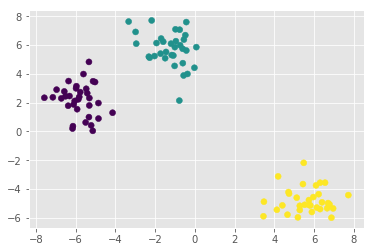

In [80]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

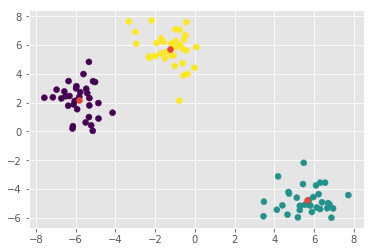

In [82]:
## Работоспособность MyKmeans
km = MyKmeans(k=3, init='random')
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=km.labels)
plt.scatter(km.centroids[:, 0], km.centroids[:, 1])

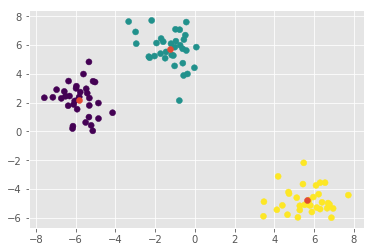

In [83]:
## Работоспособность MyKmeans++
kmpp = MyKmeans(k=3, init='k-means')
kmpp.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmpp.labels)
plt.scatter(kmpp.centroids[:, 0], kmpp.centroids[:, 1])

mbkm quitting on iteration 999


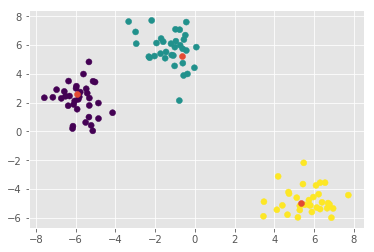

In [85]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
mbkm = MiniBatchKMeans(k=3, init='random', batch_size=10)
mbkm.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=mbkm.labels)
plt.scatter(mbkm.centroids[:, 0], mbkm.centroids[:, 1])

mbkm quitting on iteration 999


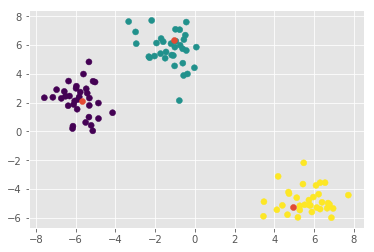

In [86]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
mbkmpp = MiniBatchKMeans(k=3, init='k-means', batch_size=10)
mbkmpp.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=mbkmpp.labels)
plt.scatter(mbkmpp.centroids[:, 0], mbkmpp.centroids[:, 1])

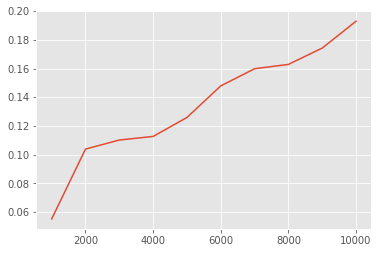

In [75]:
## Время выполнения алгоритма Kmeans из sklearn

skm = KMeans()
skmtimes = np.zeros(10)
iters = 10
size_grid = np.linspace(1000, 10000, 10, dtype=int)
for i, size in enumerate(size_grid):
    X, y = make_blobs(n_samples=size, n_features=2, centers=5, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
    for j in range(iters):
        t1 = time.time()
        skm.fit(X)
        skmtimes[i] += time.time() - t1
    skmtimes[i] /= iters
plt.plot(size_grid, skmtimes)

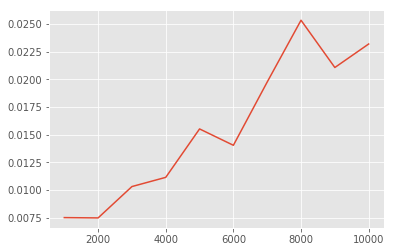

In [91]:
## Время выполнения алгоритма MyKmeans

skm = MyKmeans(k=5, init='random')
kmtimes = np.zeros(10)
iters = 10
size_grid = np.linspace(1000, 10000, 10, dtype=int)
for i, size in enumerate(size_grid):
    X, y = make_blobs(n_samples=size, n_features=2, centers=5, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
    for j in range(iters):
        t1 = time.time()
        skm.fit(X)
        kmtimes[i] += time.time() - t1
    kmtimes[i] /= iters
plt.plot(size_grid, kmtimes)

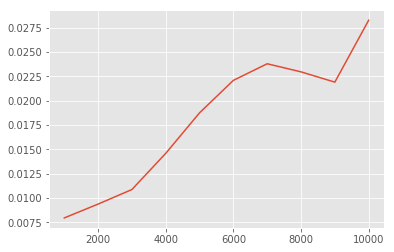

In [93]:
## Время выполнения алгоритма MyKmeans++

skm = MyKmeans(k=5, init='k-means')
kmpptimes = np.zeros(10)
iters = 10
size_grid = np.linspace(1000, 10000, 10, dtype=int)
for i, size in enumerate(size_grid):
    X, y = make_blobs(n_samples=size, n_features=2, centers=5, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
    for j in range(iters):
        t1 = time.time()
        skm.fit(X)
        kmpptimes[i] += time.time() - t1
    kmpptimes[i] /= iters
plt.plot(size_grid, kmpptimes)

In [101]:
X, y = make_blobs(n_samples=10000, n_features=2, centers=5, cluster_std=1,
               center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
model = MiniBatchKMeans(k=5, init='random', batch_size=1000, epsilon=1e-1)
%time model.fit(X)

mbkm quitting on iteration 9
CPU times: user 13 ms, sys: 7.27 ms, total: 20.3 ms
Wall time: 18.7 ms


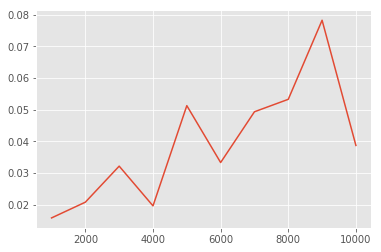

In [115]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

mbkmtimes = np.zeros(10)
iters = 10
size_grid = np.linspace(1000, 10000, 10, dtype=int)
for i, size in enumerate(size_grid):
    X, y = make_blobs(n_samples=size, n_features=2, centers=5, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
    skm = MiniBatchKMeans(k=5, init='random', batch_size=100, max_iter=300, epsilon=0.3)
    for j in range(iters):
        t1 = time.time()
        skm.fit(X)
        mbkmtimes[i] += time.time() - t1
    mbkmtimes[i] /= iters
plt.plot(size_grid, mbkmtimes)

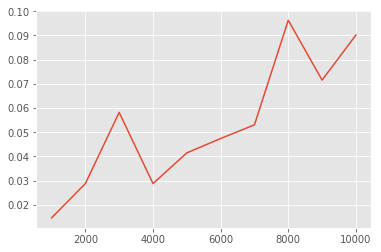

In [116]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

mbkmpptimes = np.zeros(10)
iters = 10
size_grid = np.linspace(1000, 10000, 10, dtype=int)
for i, size in enumerate(size_grid):
    X, y = make_blobs(n_samples=size, n_features=2, centers=5, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1337)
    skm = MiniBatchKMeans(k=5, init='k-means', batch_size=100, max_iter=300, epsilon=0.3)
    for j in range(iters):
        t1 = time.time()
        skm.fit(X)
        mbkmpptimes[i] += time.time() - t1
    mbkmpptimes[i] /= iters
plt.plot(size_grid, mbkmpptimes)

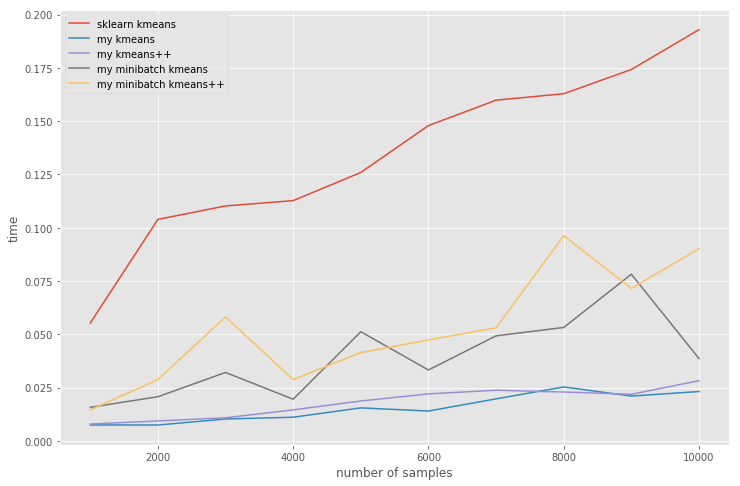

In [128]:
plt.figure(figsize=(12, 8))
plt.ylabel('time')
plt.xlabel('number of samples')
plt.plot(size_grid, skmtimes, label='sklearn kmeans')
plt.plot(size_grid, kmtimes, label='my kmeans')
plt.plot(size_grid, kmpptimes, label='my kmeans++')
plt.plot(size_grid, mbkmtimes, label='my minibatch kmeans')
plt.plot(size_grid, mbkmpptimes, label='my minibatch kmeans++')
plt.legend()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [139]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [140]:
df_sns = df_sns.drop(columns=['gradyear', 'age', 'friends', 'gender'])
df_sns.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [149]:
df_sns = df_sns - df_sns.mean()
df_sns = df_sns / df_sns.std()

Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [155]:
X = df_sns.values
X.shape

(30000, 36)

In [179]:
## MyKMeans
model = MyKmeans(k=9, init='random')
model.fit(X)
df_sns_km = df_sns
df_sns_km['label'] = model.labels
print df_sns_km.label.min(), df_sns_km.label.max()

0 8


In [183]:
for i in range(9):
    print 'label', i
    print '=' * 10
    print df_sns_km[df_sns_km.label == i].describe()
    print '=' * 10

label 0
        basketball     football       soccer     softball   volleyball  \
count  3904.000000  3904.000000  3904.000000  3904.000000  3904.000000   
mean      0.489668     0.468103     0.225175     0.262370     0.314292   
std       1.755661     1.534665     1.549570     1.652281     1.738930   
min      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
25%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
50%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
75%       0.910476     1.060031    -0.242870    -0.217924    -0.223666   
max      29.492283    20.908147    29.193722    22.764155    21.653297   

          swimming  cheerleading     baseball       tennis       sports  \
count  3904.000000   3904.000000  3904.000000  3904.000000  3904.000000   
mean      0.331117      0.403248     0.262341     0.140248     0.479349   
std       1.740572      1.806369     1.480216     1.317389     1.816400   
min      -0.259966     -0

       basketball  football  soccer  softball  volleyball  swimming  \
count         0.0       0.0     0.0       0.0         0.0       0.0   
mean          NaN       NaN     NaN       NaN         NaN       NaN   
std           NaN       NaN     NaN       NaN         NaN       NaN   
min           NaN       NaN     NaN       NaN         NaN       NaN   
25%           NaN       NaN     NaN       NaN         NaN       NaN   
50%           NaN       NaN     NaN       NaN         NaN       NaN   
75%           NaN       NaN     NaN       NaN         NaN       NaN   
max           NaN       NaN     NaN       NaN         NaN       NaN   

       cheerleading  baseball  tennis  sports  ...    shopping  clothes  \
count           0.0       0.0     0.0     0.0  ...         0.0      0.0   
mean            NaN       NaN     NaN     NaN  ...         NaN      NaN   
std             NaN       NaN     NaN     NaN  ...         NaN      NaN   
min             NaN       NaN     NaN     NaN  ...         N

In [185]:
## MyKMeans++
model = MyKmeans(k=9, init='k-means')
model.fit(X)
df_sns_km = df_sns
df_sns_km['label'] = model.labels
print df_sns_km.label.min(), df_sns_km.label.max()

0 8


In [186]:
for i in range(9):
    print 'label', i
    print '=' * 10
    print df_sns_km[df_sns_km.label == i].describe()
    print '=' * 10

label 0
       basketball  football   soccer  softball  volleyball  swimming  \
count    1.000000  1.000000  1.00000  1.000000    1.000000  1.000000   
mean    -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
std           NaN       NaN      NaN       NaN         NaN       NaN   
min     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
25%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
50%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
75%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
max     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   

       cheerleading  baseball    tennis    sports  ...    shopping   clothes  \
count      1.000000  1.000000  1.000000  1.000000  ...    1.000000  1.000000   
mean      -0.207324 -0.201127 -0.168936 -0.297118  ...   -0.487306  1.801583   
std             NaN       NaN       NaN       NaN  ...         NaN       NaN   
min       -0.207324 -0.

       basketball    football      soccer    softball  volleyball    swimming  \
count  845.000000  845.000000  845.000000  845.000000  845.000000  845.000000   
mean     0.116332    0.214431    0.024208    0.004457    0.172080    0.248210   
std      1.038043    1.228161    0.825859    0.816845    1.310718    1.411875   
min     -0.332212   -0.357691   -0.242870   -0.217924   -0.223666   -0.259966   
25%     -0.332212   -0.357691   -0.242870   -0.217924   -0.223666   -0.259966   
50%     -0.332212   -0.357691   -0.242870   -0.217924   -0.223666   -0.259966   
75%     -0.332212    1.060031   -0.242870   -0.217924   -0.223666   -0.259966   
max      7.123912   10.984089   10.659571    6.541511   16.965376   22.951305   

       cheerleading    baseball      tennis      sports  ...      shopping  \
count    845.000000  845.000000  845.000000  845.000000  ...    845.000000   
mean       0.411620    0.014361    0.133240    0.089755  ...      0.795143   
std        1.681609    0.770310    1

In [205]:
## MyKMeans с MiniBatchMyKMeans
model = MiniBatchKMeans(k=9, init='random', batch_size=10000, max_iter=300)
model.fit(X)
df_sns_km = df_sns
df_sns_km['label'] = model.labels
print df_sns_km.label.min(), df_sns_km.label.max()

0 6


In [206]:
for i in range(9):
    print 'label', i
    print '=' * 10
    print df_sns_km[df_sns_km.label == i].describe()
    print '=' * 10

label 0
        basketball     football       soccer     softball   volleyball  \
count  4216.000000  4216.000000  4216.000000  4216.000000  4216.000000   
mean      0.498703     0.452724     0.222604     0.251196     0.290790   
std       1.759727     1.518002     1.535745     1.634211     1.680542   
min      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
25%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
50%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
75%       0.910476     1.060031    -0.242870    -0.217924    -0.223666   
max      29.492283    20.908147    29.193722    22.764155    21.653297   

          swimming  cheerleading     baseball       tennis       sports  \
count  4216.000000   4216.000000  4216.000000  4216.000000  4216.000000   
mean      0.306643      0.380199     0.255775     0.156367     0.453105   
std       1.684108      1.769936     1.488911     1.427604     1.770894   
min      -0.259966     -0

         basketball      football        soccer      softball    volleyball  \
count  25783.000000  25783.000000  25783.000000  25783.000000  25783.000000   
mean      -0.081534     -0.074125     -0.036391     -0.041067     -0.047541   
std        0.781015      0.864632      0.876670      0.845543      0.828102   
min       -0.332212     -0.357691     -0.242870     -0.217924     -0.223666   
25%       -0.332212     -0.357691     -0.242870     -0.217924     -0.223666   
50%       -0.332212     -0.357691     -0.242870     -0.217924     -0.223666   
75%       -0.332212     -0.357691     -0.242870     -0.217924     -0.223666   
max       10.851974     10.984089     23.742501     16.004720     16.965376   

           swimming  cheerleading      baseball        tennis        sports  \
count  25783.000000  25783.000000  25783.000000  25783.000000  25783.000000   
mean      -0.050207     -0.062162     -0.041816     -0.025562     -0.074080   
std        0.825757      0.789881      0.888082    

In [207]:
## MyKMeans++ с MiniBatchMyKMeans
model = MiniBatchKMeans(k=9, init='k-means', batch_size=10000, max_iter=300)
model.fit(X)
df_sns_km = df_sns
df_sns_km['label'] = model.labels
print df_sns_km.label.min(), df_sns_km.label.max()

0 8


In [208]:
for i in range(9):
    print 'label', i
    print '=' * 10
    print df_sns_km[df_sns_km.label == i].describe()
    print '=' * 10

label 0
       basketball  football   soccer  softball  volleyball  swimming  \
count    1.000000  1.000000  1.00000  1.000000    1.000000  1.000000   
mean    -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
std           NaN       NaN      NaN       NaN         NaN       NaN   
min     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
25%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
50%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
75%     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   
max     -0.332212  2.477754 -0.24287 -0.217924   -0.223666  1.674306   

       cheerleading  baseball    tennis    sports  ...    shopping   clothes  \
count      1.000000  1.000000  1.000000  1.000000  ...    1.000000  1.000000   
mean      -0.207324 -0.201127 -0.168936 -0.297118  ...   -0.487306  1.801583   
std             NaN       NaN       NaN       NaN  ...         NaN       NaN   
min       -0.207324 -0.

        basketball     football       soccer     softball   volleyball  \
count  4617.000000  4617.000000  4617.000000  4617.000000  4617.000000   
mean     -0.036680     0.060839    -0.103077    -0.073571    -0.049024   
std       0.741364     0.926788     0.454468     0.569219     0.666732   
min      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
25%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
50%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
75%      -0.332212    -0.357691    -0.242870    -0.217924    -0.223666   
max       8.366599     6.730921     4.118107     6.541511     7.589535   

          swimming  cheerleading     baseball       tennis       sports  \
count  4617.000000   4617.000000  4617.000000  4617.000000  4617.000000   
mean      0.285920      0.381389    -0.081981     0.092501    -0.075507   
std       1.654013      1.829401     0.528661     1.355810     0.740486   
min      -0.259966     -0.207324 

## Вывод

И KMeans, и MiniBatchKMeans со случайной инициализацией центроидов плохо находят маленькие кластеры (или же игнорируют выбросы). В тоже время моя реализация оказалась чрезмерно чувствительной к крупным кластерам. Некоторые из 9 кластеров получались пустыми.

В MiniBatchKMeans при маленьком batch_size находилось 2 крупных кластера, и больше ничего, пришлось подбирать более большой batch_size. (Причина понятна, при маленьком batch_size мал шанс того, что в батч на данной итерации попадёт достаточное число точек из маленького относительно других класа)

На этих данных k-means++ в целом сработал лучше, самое адекватное разбиение получилось с применением MiniBatchKMeans с KMeans++. Выделились кластеры, похожие на те, которые мы получали в этих данных на лекции с использованием SKlearn KMeans